# Linear Regression

## Getting the data

In [1]:
# load the libraries

import tensorflow as tf
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
print(tf.__version__)

%matplotlib inline

1.3.0


In [2]:
# get the dataset

data, targets = load_boston(True)
data = normalize(data)
targets = targets.reshape((targets.shape[0],1)) # reshape targets to follow our variables
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.3, random_state = 42)

## Boston housing dataset Variable 
#### features :
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per ($10,000)

* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population

#### Targets :

* MEDV - Median value of owner-occupied homes in $1000's


Text(0.5,1,'Number of rooms vs House Price')

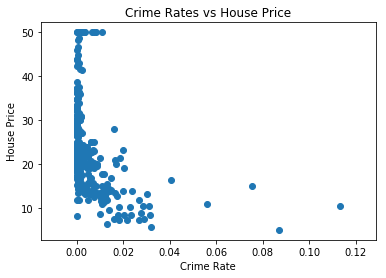

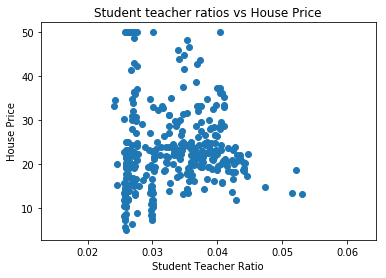

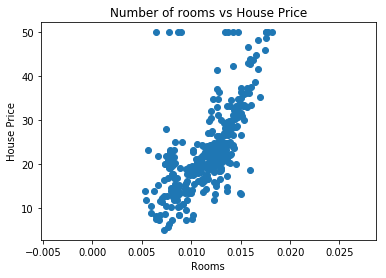

In [3]:
# get the crime rates and prices
crime_rates, prices = [X_train[i][0] for i in range(X_train.shape[0])], y_train.tolist()
# student-teacher ratio is the 10th feature
student_teacher_ratios = [X_train[i][10] for i in range(X_train.shape[0])]
# number of roots is the 5th feature
rooms = [X_train[i][5] for i in range(X_train.shape[0])]

plt.scatter(crime_rates, prices)
plt.xlabel('Crime Rate')
plt.ylabel('House Price')
plt.title('Crime Rates vs House Price')
plt.figure()
plt.scatter(student_teacher_ratios, prices)
plt.xlabel('Student Teacher Ratio')
plt.ylabel('House Price')
plt.title('Student teacher ratios vs House Price')
plt.figure()
plt.scatter(rooms, prices)
plt.xlabel('Rooms')
plt.ylabel('House Price')
plt.title('Number of rooms vs House Price')

In [4]:
# create placeholders for X and y, our features and tagets, respectively.
X = tf.placeholder(tf.float32, shape = [None, 13])
y = tf.placeholder(tf.float32, shape = [None,1])

# create variables for W and b, and initialize them with constants.
W = tf.Variable(tf.constant(0.1, shape = [13,1 ]))
b = tf.Variable(tf.constant(0.1))

In [5]:
# use Tensorflow to write out the linear regression model and assign it to a variable y_pred.

y_pred = tf.matmul(X, W) + b
loss = tf.reduce_mean(tf.square(y_pred - y))
opt = tf.train.GradientDescentOptimizer(learning_rate = .5).minimize(loss)

In [6]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
initial_loss = loss.eval(feed_dict = {X: X_train, y: y_train})
print("initial loss: {}".format(initial_loss))
for i in range(5000):
    # TODO: run the optimization step with the training data passed in.
    sess.run(opt, feed_dict = {X: X_train, y: y_train})
    if i % 100 == 0:
        # print the current error of the model so we can know how the model is doing while it is training
        print("current loss: {}".format(loss.eval(feed_dict = {X: X_train, y: y_train})))

initial loss: 605.6507568359375
current loss: 536.6200561523438
current loss: 66.02755737304688
current loss: 64.5899658203125
current loss: 63.52979278564453
current loss: 62.68644714355469
current loss: 61.97214889526367
current loss: 61.33811569213867
current loss: 60.756771087646484
current loss: 60.21210861206055
current loss: 59.69464874267578
current loss: 59.198455810546875
current loss: 58.71974182128906
current loss: 58.2559814453125
current loss: 57.80535888671875
current loss: 57.36661911010742
current loss: 56.93873596191406
current loss: 56.52097702026367
current loss: 56.11275100708008
current loss: 55.713531494140625
current loss: 55.32292175292969
current loss: 54.94056701660156
current loss: 54.5661506652832
current loss: 54.199440002441406
current loss: 53.84015655517578
current loss: 53.48813247680664
current loss: 53.14316177368164
current loss: 52.805023193359375
current loss: 52.473594665527344
current loss: 52.14869689941406
current loss: 51.830177307128906
curr

In [7]:
data, targets = X_test, y_test
predictions = sess.run(y_pred, feed_dict = {X: data})
predictions = predictions.flatten()
targets = targets.reshape((152))

# lets take a look at some predictions
for i in range(10):
    randint = np.random.randint(0, 152)
    pred = predictions[randint]
    actual = targets[randint]
    print("prediction: {}, actual was: {}".format(pred, actual))

prediction: 29.10429573059082, actual was: 29.1
prediction: 19.898860931396484, actual was: 20.2
prediction: 20.24734115600586, actual was: 19.6
prediction: 34.01639175415039, actual was: 50.0
prediction: 14.325355529785156, actual was: 10.8
prediction: 21.179466247558594, actual was: 18.7
prediction: 21.854942321777344, actual was: 19.6
prediction: 27.306413650512695, actual was: 50.0
prediction: 22.787330627441406, actual was: 21.7
prediction: 20.484004974365234, actual was: 50.0


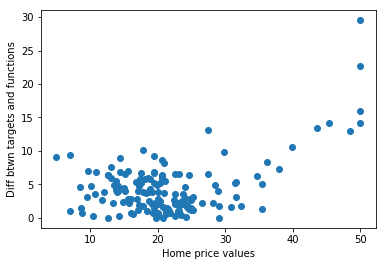

average absolute difference: 4408.327848032901
average house price: 21407.894736842107


In [8]:
diffs = abs(targets - predictions)
avg_diffs = np.mean(diffs)
avg_houseprice = np.mean(targets)
plt.xlabel('Home price values')
plt.ylabel('Diff btwn targets and functions')
plt.scatter(targets, diffs)
plt.show()
print("average absolute difference: {}".format(avg_diffs * 1000))
print("average house price: {}".format(avg_houseprice * 1000))

* Our model seems to do okay with lower and averaged price houses, but appears to do terribly with higher-priced houses. Think about why this may be. It's always important to consider the data that you used to train your model. In particular, it might be likely that our dataset didn't have many examples of highly priced houses, so our model may have not learned how to predict prices for them. What's cool about data science and machine learning is that we can easily test this theory.
<br><br>
* All of the prices in the dataset are between 0 and 50 (in thousands of dollars). We can count up how many examples we have for houses between 0 and $10, 000, between $10,000 and $20,000, and so on. This will let us examine if there are any imbalances with respect to the house prices.

In [9]:
data, targets = load_boston(True)
price_buckets = [0, 10, 20, 30, 40, 50]
limits = dict(zip(price_buckets, [0  for _ in range(len(price_buckets))]))
print(limits)
for price in targets:
    limits[int(price/10) * 10]+=1

for k, v in sorted(limits.items()):
    print("{} : {}".format(k, v))

{0: 0, 50: 0, 20: 0, 40: 0, 10: 0, 30: 0}
0 : 24
10 : 186
20 : 212
30 : 53
40 : 15
50 : 16


# Resources

* https://github.com/uclaacmai/tf-workshop-series-fall17
* https://aqibsaeed.github.io/2016-07-07-TensorflowLR/
* https://www.tensorflow.org/tutorials/